# PID implementation

The PID controller has been implemented according to the gidelines in the lesson. For clarity, we keep three variables to reflect the state of the three componentes of the PID.

```cpp
void PID::UpdateError(double cte) {
  i_error_ += cte;
  d_error_ = (cte - p_error_);
  p_error_ = cte;
}

double PID::TotalError() {
  return -Kp_ * p_error_ - Ki_ * i_error_ - Kd_ * d_error_;
}
```

The car is controlled by two independent PIDs, one controls the steering wheel angle, and the other the throttle/brake pedals. For the second one I have fixed a speed of 50mph.

In order to facilitate the tuning of the PID parameters, I have modified the original program to dump the data of the simulation to the standard output.

## PID parameters selection

In order to select the parameters of the simulation, I run several iterations, inspired by the twiddle algorithm, but not following it strictly. I also applied the next heuristics to fine-tune the parameters of the steering wheel PID:
- If the car has problems to follow closed curves, or to return to the center, I increment the proportional component.
- If the error oscillates too much I increment the derivative component.
- Keep the integral component under control. We want to correct a possible systematic bias, but a value too high can create inestabilities in the control (e.g. the integral component of the speed controller accummulates a lot of error at the beginning of the circuit, as it starts from 0mph. if the $K_i$ is too high, it will make the car to keep accelerating after the goal speed is reached. This can eventually lead to catastrophic oscillations of the speed.)

This is the final selection of parameters:

<table>
    <tr>
        <th>Controller</th>
        <th>$K_p$</th>
        <th>$K_i$</th>
        <th>$K_d$</th>
    </tr>
    <tr>
        <th>Steer</th>
        <td>.11</td>
        <td>.000001</td>
        <td>3</td>
    </tr>
    <tr>
        <th>Throttle</th>
        <td>.2</td>
        <td>.00005</td>
        <td>.05</td>
    </tr>
</table>    

Implemented in `main.c`:

```cpp
  PID pid_steer;
  pid_steer.Init(.11, .000001, 3);

  PID pid_throttle;
  pid_throttle.Init(.2, .00005, .05);
```


## Analysis of the PID error

To facilitate the selection of the parameters, I have used pandas to plot the controller error.

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('./dump.csv', header=None, names=['CTE', 'speed', 'angle',  'throttle', 'steer'])
df.head()

,CTE,speed,angle,throttle,steer
0,0.7598,0.000,0.0000,1.0,-1.000000
1,0.7598,0.438,0.0000,1.0,-0.083580
2,0.7598,0.876,-24.5637,1.0,-0.083580
3,0.7598,1.314,-1.6532,1.0,-0.083581
4,0.7598,1.752,-1.6532,1.0,-0.083582


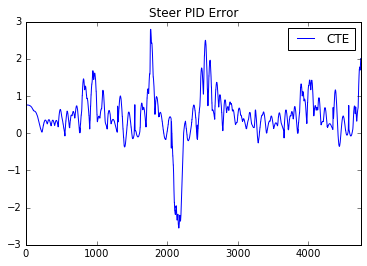

In [13]:
_ = df[df.columns[[0]]][:].plot(title="Steer PID Error")

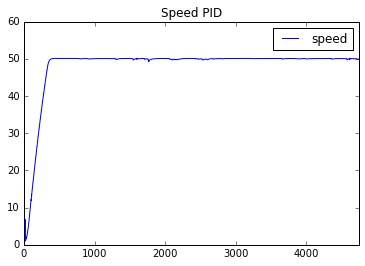

In [14]:
_ = (df[df.columns[[1]]][:]).plot(title="Speed PID")